# CatDog

### Orlando Python - Mob Programming

We're going to try making a convolutional neural network in Keras that can distinguish cats and dogs. This is based on an old [Kaggle competition](https://www.kaggle.com/c/dogs-vs-cats/rules). The original training dataset (available from the link) had about 25K images; we've cut this down to 4K images for this project (2K of each).

First things first, we need to import the image data. We can use glob to get all of the file names which match a given pattern.

In [1]:
from glob import glob

In [2]:
cats = glob('train/cat*')
dogs = glob('train/dog*')

print(cats[:10])

['train/cat.0.jpg', 'train/cat.1.jpg', 'train/cat.10.jpg', 'train/cat.100.jpg', 'train/cat.1000.jpg', 'train/cat.1001.jpg', 'train/cat.1002.jpg', 'train/cat.1003.jpg', 'train/cat.1004.jpg', 'train/cat.1005.jpg']


We now have two lists of file names. Before we continue, we can already create our final labels using a handy Python trick.

In [3]:
import numpy as np

In [4]:
labels = np.array([[0]] * len(cats) + [[1]] * len(dogs))

print('Labels for cats:\n', labels[:5])
print('Labels for dogs:\n', labels[-5:])

Labels for cats:
 [[0]
 [0]
 [0]
 [0]
 [0]]
Labels for dogs:
 [[1]
 [1]
 [1]
 [1]
 [1]]


Our labels are one-hot encoded (0 for cat, 1 for dog) and will eventually correspond to the index of the Keras output node. We cast our labels to a Numpy array because most ML programs in Python are optimized for it. We'll do that later for our features as well.

Let's quickly take a look at what we're working with.

In [5]:
import matplotlib.pyplot as plt
# Note: matplotlib's imread imports images as RGB
#       opencv's (cv2) imread import images as BGR
from matplotlib.image import imread
# This line tells matplotlib to display output in the notebook instead of a separate window
%matplotlib inline

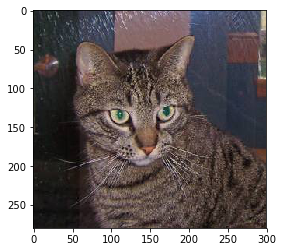

In [6]:
img = imread(cats[1])
plt.imshow(img)

Nice kitty :)
    
We already can infer something about our data. Our images will likely not be a standard size. We can verify this in a little bit, but we'll likely have to add some amout of preprocessing to our dataset.

Since we know that our image import works, we can import our feature set. We'll apply a limit for now so that we can start training the model faster and eventually expand it.

In [7]:
LIMIT = 500

features_cats = [imread(cat) for cat in cats[:LIMIT]]
features_dogs = [imread(dog) for dog in dogs[:LIMIT]]

We'll quickly verify that our import worked.

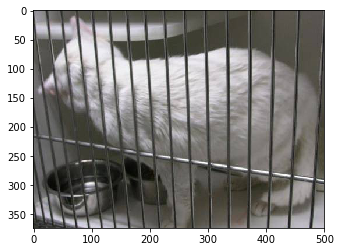

In [8]:
plt.imshow(features_cats[42])

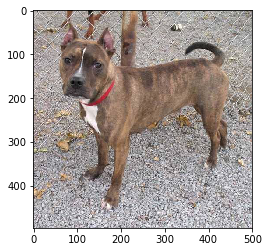

In [9]:
plt.imshow(features_dogs[42])

Now we need to do some preprocessing. As shown above, our images are all different shapes and resolutions. They need to be standardized into a constant size in order to be fed into the neural net. We decided to do the following:

* Zero-pad our images with black pixels to make them square
* Resize our images to 45 x 45 pixels for a final size of 45 x 45 x 3

In [10]:
import cv2

In [11]:
BLACK = [0, 0, 0]

def preprocess(img: 'h*w*3 image array') -> '45*45*3 image array':
    """Returns a square, 0-padded, and scaled copy of the original image"""
    h, w = img.shape[:2]
    if h > w:
        pad = int((h-w)/2)
        img = cv2.copyMakeBorder(img, 0, 0, pad, pad, cv2.BORDER_CONSTANT, value=BLACK)
    elif w > h:
        pad = int((w-h)/2)
        img = cv2.copyMakeBorder(img, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=BLACK)
    img = cv2.resize(img, (45, 45))
    return img

To demonstrate our preprocess function, let's first show the original image.

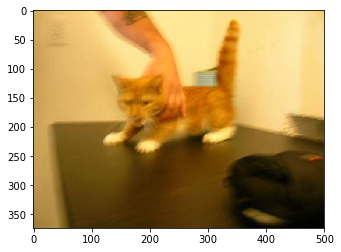

In [12]:
plt.imshow(features_cats[0])

Now we'll run it through our preprocess function.

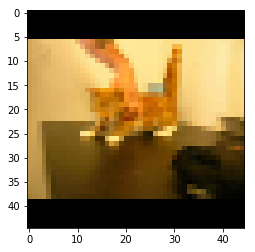

In [13]:
plt.imshow(preprocess(features_cats[0]))

Yes it's blury, but re have reduced the overall complexity our image which makes for a faster, simpler model. More importantly, we didn't introduce any image warping because we padded our images first.

Now we'll apply this to all of our images.

In [14]:
features_cats_pad=[preprocess(cat) for cat in features_cats]
features_dogs_pad=[preprocess(dog) for dog in features_dogs]

And some examples

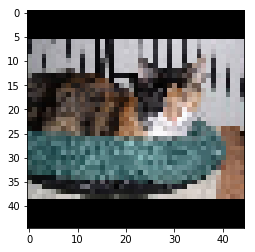

In [15]:
plt.imshow(features_cats_pad[321])

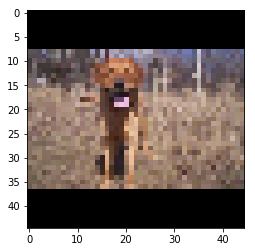

In [16]:
plt.imshow(features_dogs_pad[123])

Finally, we'll combine our images into a single features list and cast to a Numpy array just like we did with our labels.

In [17]:
features = np.array(features_cats_pad + features_dogs_pad)

We now have our final feature set. Even with all of the changes we made to our data, we can still safely say that the image at index n corresponds to the label at index n. Cool, right?

Finally, we'll create a data checkpoint. We'll export our features and labels as binary Python objects using the Pickle library.

In [18]:
from pickle import dump

In [19]:
dump(features, open("features.pkl" , "wb"))
dump(labels, open("labels.pkl" , "wb"))

That's as far as we got during our first meeting. We'll pick this up at a future meeting and be well prepared to start implementing our Keras model.